## Exploring Linkedin Summaries using Topic Modeling


In [3]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib as matplot
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)
%matplotlib inline
import matplotlib
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

In [4]:
#Load the Data Scientist Linkedin Data
linkedinDatasci = pd.read_csv("Datasets/datascientist.csv")

linkedinDatasci['summary'] = linkedinDatasci['summary'].str.strip()

#Remove the first column
del linkedinDatasci['Unnamed: 0']

# We only need the summary text column from the data
linkedinSummary = linkedinDatasci[['summary']];

#Remove NaNs
linkedinSummary.dropna(how='any', inplace=True)
linkedinSummary = linkedinSummary.astype('str');

#print out the dataset
linkedinSummary

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,summary
0,"Ambitious, driven, intelligent, steely, efficient, resourceful, critical, savvy, unrelenting. Thinker, doer,\n\n realist, idealist, willing, able, can do, will do.\n..."
1,"Proactive, self-motivated, and results-driven data scientist who thrives in intellectually challenging positions. Excels at establishing positive working relationships with stakeholders and leading technical teams from business concept through deployment of analytical solution. Recognized for thought leadership and superior problem solving skills on projects that require creative, interdisciplinary solutions. \n\n..."
2,"I have been learning and working in analytics since 2012. There are many reasons why I love this field. The main reason is that I like to work on problems that are interesting and not trivial. I do not have a specific list of languages and software that must fit with me. I just enjoy the opportunity of working on complex data problems and trying to find a solution for them.Here is a list of data science topics and software that I know:Core Concepts: Data Visualization - Dashboard DevelopmentMachine Learning (Linear Regression, Logistic Regression, Clustering, Classification, Pattern Recognition)Text MiningDeep Learning (Artificial Neural Networks & Convolutional Neural Networks)ETL (Extract, Transform, and Load), Data WarehousingHere is a list of statistical software that I know: R SASMicrosoft ExcelHere is a list of Big Data technologies that I know: VerticaHadoop (MapR) I know these programming languages: JavaPythonSQLI know these data visualization tools: TableauGephiI worked with this ETL and Data Warehousing software: Informatica PowerCenterToad for Oracle\n\n..."
3,"Data Science, as evident, involves scientific thinking around data and communicating it to non-technical audience, is an art, and I work at the intersection of this art and science. I started my journey, back in 2013, with Andrew Ng’s lectures, working on fancy hand-writing recognition algorithms using Neural Nets, which led me to my internship at Zomato , where I experimented with Natural Language Processing for the first time and since then I have come a long way, worked on an online NLP based debating framework to help school students, presented at various platforms on topics pertaining to NLP. I love to read about ML, particularly, deep learning and one of my goals this year is to finish 14 Analytics MOOC’s . I have delivered a talk on NLP at PyCon Bangalore and a poster a PyCon USA. Apart from my work, I play Basketball, taking advantage of the fact that I am a tall guy. I listen to music all the time, as it helps me to think amid a loud environment. Also, I have recently started reading a lot of non-fiction books. If you still want to know more about me, feel free to drop me a message. \n..."
4,"Data scientist with academic background in genetics and bioinformatics, recent professional\n\n experience in marketing science.\n..."
5,"I am an engineer focused on solving real-world problems utilizing statistical analysis, machine learning, software engineering best practices, and working with data at scale. I enjoy working on complex problems and figuring out how to prototype valuable solutions. I want to help people think the way the world needs you to think in order to solve the complex engineering problems we have in front of us. If you'd like to talk, feel free to reach out to me.\n\n..."
6,"Data scientist with a strong math background and experience in big data, machine learning, and statistics. Passionate about explaining data science to non-technical business audiences.The best way to describe myself would be that I’m a passionate, dedicated worker who believes highly in teamwork, which I showed during my role as Business Analyst by working collaboratively with different teams. I played an instrumental role in getting the new admissions increased by 18%. I love being critically involved in multiple projects and I think I thrive in this type of environme

In [5]:
#Remove any unnecessary characters 
linkedinSummary['summary'] = linkedinSummary['summary'].replace(r'\t', '', regex=True) 
linkedinSummary['summary'] = linkedinSummary['summary'].replace(r'\n', ' ', regex=True) 
linkedinSummary['summary'] = linkedinSummary['summary'].replace(r'\...', ' ', regex=True)
linkedinSummary['summary'] = linkedinSummary['summary'].replace(r'\..', ' ', regex=True)
linkedinSummary['summary'] = linkedinSummary['summary'].replace('●', '', regex=True) 
linkedinSummary['summary'] = linkedinSummary['summary'].replace('•', '', regex=True)
linkedinSummary['summary'] = linkedinSummary['summary'].replace(r'\-', '', regex=True) 
linkedinSummary['summary'] = linkedinSummary['summary'].replace(r'\&', '', regex=True)
linkedinSummary['summary'] = linkedinSummary['summary'].replace(r'\$', '', regex=True)
linkedinSummary['summary'] = linkedinSummary['summary'].replace(',', '', regex=True)
#linkedinSummary['summary'] = linkedinSummary['summary'].replace('\d+', '', regex=True)
linkedinSummary['summary'] = linkedinSummary['summary'].replace(r'\(','', regex=True)
linkedinSummary['summary'] = linkedinSummary['summary'].replace(r'\)','', regex=True)
linkedinSummary['summary'] = linkedinSummary['summary'].replace(r'\/','', regex=True)
linkedinSummary['summary'] = linkedinSummary['summary'].replace(r'\:','', regex=True) 
linkedinSummary['summary'] = linkedinSummary['summary'].replace(r'\–','', regex=True)
linkedinSummary['summary'] = linkedinSummary['summary'].replace(r'\%','', regex=True)
linkedinSummary['summary'] = linkedinSummary['summary'].replace(r'\*','', regex=True)
linkedinSummary['summary'] = linkedinSummary['summary'].replace(r'\@','', regex=True)
linkedinSummary['summary'] = linkedinSummary['summary'].replace(r'\_________','', regex=True)
linkedinSummary['summary'] = linkedinSummary['summary'].replace(r'\____','', regex=True)
linkedinSummary['summary'] = linkedinSummary['summary'].replace(r'\!','', regex=True)
linkedinSummary['summary'] = linkedinSummary['summary'].replace(r'\®','', regex=True)
linkedinSummary['summary'] = linkedinSummary['summary'].replace(r'\>','', regex=True)
linkedinSummary['summary'] = linkedinSummary['summary'].replace(r'\?','', regex=True)
linkedinSummary['summary'] = linkedinSummary['summary'].replace(r'\;','', regex=True)
linkedinSummary['summary'] = linkedinSummary['summary'].replace(r'\=','', regex=True)

linkedinSummary['summary'] = linkedinSummary['summary'].str.lower()

#Remove any row with a NaN
#googleDatasci['summary'] = googleDatasci['summary'].dropna()
#googleDatasci = googleDatasci[googleDatasci.summary.str.contains("NaN") == False]


linkedinSummary

,summary
0,ambitious driven intelligent steely efficient resourceful critical savvy unrelenting thinker doer realist idealist willing able can do will do
1,proactive selfmotivated and resultsdriven data scientist who thrives in intellectually challenging positions xcels at establishing positive working relationships with stakeholders and leading technical teams from business concept through deployment of analytical solution ecognized for thought leadership and superior problem solving skills on projects that require creative interdisciplinary solutions
2,i have been learning and working in analytics since 2012 here are many reasons why i love this field he main reason is that i like to work on problems that are interesting and not trivial do not have a specific list of languages and software that must fit with me just enjoy the opportunity of working on complex data problems and trying to find a solution for them re is a list of data science topics and software that i knowcore concepts data visualization dashboard developmentmachine learning linear regression logistic regression clustering classification pattern recognitiontext miningdeep learning artificial neural networks convolutional neural networksetl extract transform and load data warehousinghere is a list of statistical software that i know r sasmicrosoft excelhere is a list of big data technologies that i know verticahadoop mapr i know these programming languages javapythonsqli know these data visualization tools tableaugephii worked with this etl and data warehousing software informatica powercentertoad for oracle
3,data science as evident involves scientific thinking around data and communicating it to nontechnical audience is an art and i work at the intersection of this art and science started my journey back in 2013 with andrew ng’s lectures working on fancy handwriting recognition algorithms using neural nets which led me to my internship at zomato where i experimented with natural language processing for the first time and since then i have come a long way worked on an online nlp based debating framework to help school students presented at various platforms on topics pertaining to nlp love to read about ml particularly deep learning and one of my goals this year is to finish 14 analytics mooc’s have delivered a talk on nlp at pycon bangalore and a poster a pycon usa part from my work i play basketball taking advantage of the fact that i am a tall guy listen to music all the time as it helps me to think amid a loud environment lso i have recently started reading a lot of nonfiction books f you still want to know more about me feel free to drop me a message
4,data scientist with academic background in genetics and bioinformatics recent professional experience in marketing science
5,i am an engineer focused on solving realworld problems utilizing statistical analysis machine learning software engineering best practices and working with data at scale enjoy working on complex problems and figuring out how to prototype valuable solutions want to help people think the way the world needs you to think in order to solve the complex engineering problems we have in front of us f you'd like to talk feel free to reach out to me
6,data scientist with a strong math background and experience in big data machine learning and statistics passionate about explaining data science to nontechnical business audiences e best way to describe myself would be that i’m a passionate dedicated worker who believes highly in teamwork which i showed during my role as business analyst by working collaboratively with different teams played an instrumental role in getting the new admissions increased by 18 love being critically involved in multiple projects and i think i thrive in this type of environment it keeps my mind sharp active and engaged have an insatiable intellectual curiosity and ability to mine hidden gems located within large sets of data ills✔ analytical tools pythonscikitlearn pan

In [9]:
from nltk.tokenize import WhitespaceTokenizer
ws_tokenizer = WhitespaceTokenizer()

article = linkedinSummary['summary'][1]

# tokenize example document
nyt_ws_tokens = ws_tokenizer.tokenize(article.lower())

print (nyt_ws_tokens)

import nltk
from nltk.corpus import stopwords

['proactive', 'selfmotivated', 'and', 'resultsdriven', 'data', 'scientist', 'who', 'thrives', 'in', 'intellectually', 'challenging', 'positions', 'xcels', 'at', 'establishing', 'positive', 'working', 'relationships', 'with', 'stakeholders', 'and', 'leading', 'technical', 'teams', 'from', 'business', 'concept', 'through', 'deployment', 'of', 'analytical', 'solution', 'ecognized', 'for', 'thought', 'leadership', 'and', 'superior', 'problem', 'solving', 'skills', 'on', 'projects', 'that', 'require', 'creative', 'interdisciplinary', 'solutions']


## Term Weighting using TF-IDF

In [10]:
linkedinSummary['summary'].to_csv('summary.txt', index=False, sep=' ', header=None)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
# we can pass in the same preprocessing parameters
stop_words = set(stopwords.words('english'))

raw_documents = []
snippets = []
with open("summary.txt","r") as fin:
    for line in fin.readlines():
        text = line.strip()
        raw_documents.append( text )
        # keep a short snippet of up to 100 characters as a title for each article
        snippets.append( text[0:min(len(text),100)] )
print("Read %d raw text documents" % len(raw_documents))

Read 449 raw text documents


In [12]:
vectorizer = TfidfVectorizer(stop_words, max_df = 20)
A = vectorizer.fit_transform(raw_documents)
print( "Created %d X %d TF-IDF-normalized document-term matrix" % (A.shape[0], A.shape[1]))

Created 449 X 5185 TF-IDF-normalized document-term matrix


In [13]:
# extract the resulting vocabulary
terms = vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 5185 distinct terms


In [14]:
import operator
def rank_terms( A, terms ):
    # get the sums over each column
    sums = A.sum(axis=0)
    # map weights to the terms
    weights = {}
    for col, term in enumerate(terms):
        weights[term] = sums[0,col]
    # rank the terms by their weight over all documents
    return sorted(weights.items(), key=operator.itemgetter(1), reverse=True)

In [15]:
ranking = rank_terms( A, terms )
for i, pair in enumerate( ranking[0:20] ):
    print( "%02d. %s (%.2f)" % ( i+1, pair[0], pair[1] ) )

01. operations (4.70)
02. killed (4.12)
03. history (4.11)
04. demonstrated (4.04)
05. student (3.52)
06. enthusiast (3.23)
07. areas (3.23)
08. consulting (3.23)
09. physics (3.17)
10. trong (3.13)
11. real (3.10)
12. looking (3.09)
13. math (3.04)
14. related (3.04)
15. interests (3.02)
16. solid (2.99)
17. drive (2.98)
18. economics (2.93)
19. creative (2.90)
20. good (2.90)


## Initial Topic Modeling 

In [47]:
# Input parameter for the number of topics to make
k = 4

In [48]:
# create the model
from sklearn import decomposition
model = decomposition.NMF( init="nndsvd", n_components=k ) 
# apply the model and extract the two factor matrices
W = model.fit_transform( A )
H = model.components_

In [49]:
#See the output of the model
W.shape

(449, 4)

In [50]:
# round to 2 decimal places for display purposes# round 
W[0,:].round(2)

array([ 0.06,  0.  ,  0.  ,  0.  ])

In [51]:
#See the H factor
H.shape

(4, 5185)

In [52]:
#What is science associated with
term_index = terms.index('drive')
# round to 2 decimal places for display purposes
H[:,term_index].round(2)

array([ 0.15,  0.  ,  0.01,  0.  ])

## Initial Topic Descriptors

In [53]:
def get_descriptor( terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
    return top_terms

In [54]:
descriptors = []
for topic_index in range(k):
    descriptors.append( get_descriptor( terms, H, topic_index, 10 ) )
    str_descriptor = ", ".join( descriptors[topic_index] )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: math, economics, insight, creative, student, able, urrently, drive, operations, ve
Topic 02: killed, history, demonstrated, trong, internet, operations, institute, industrial, services, advertising
Topic 03: bayes, boosting, trees, mapreduce, matplotlib, feature, knn, html, naive, ggplot2
Topic 04: transactional, sources, order, recommendations, credit, massive, unstructured, patterns, structured, realtime


In [55]:
def plot_top_term_weights( terms, H, topic_index, top ):
    # get the top terms and their weights
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    top_terms = []
    top_weights = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
        top_weights.append( H[topic_index,term_index] )
    # note we reverse the ordering for the plot
    top_terms.reverse()
    top_weights.reverse()
    # create the plot
    fig = plt.figure(figsize=(13,8))
    # add the horizontal bar chart
    ypos = np.arange(top)
    ax = plt.barh(ypos, top_weights, align="center", color="green",tick_label=top_terms)
    plt.xlabel("Term Weight",fontsize=14)
    plt.tight_layout()
    plt.show()

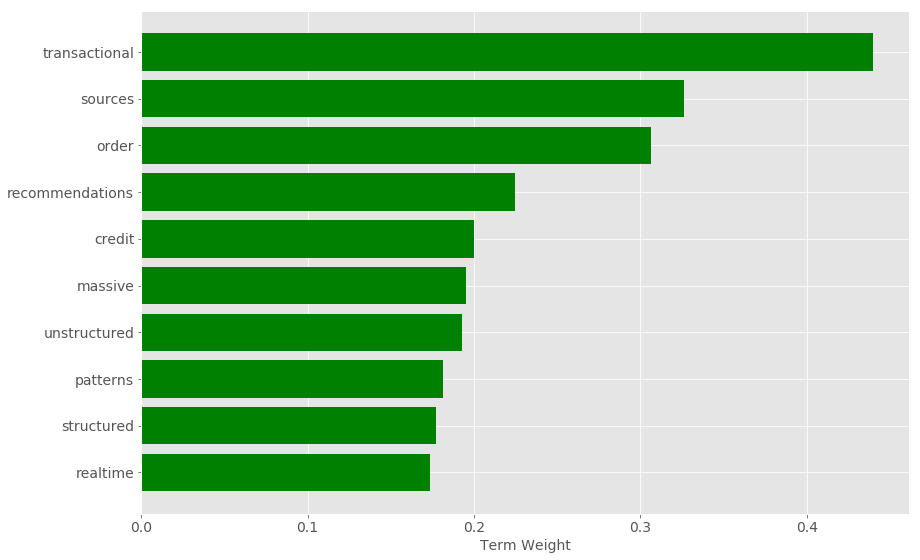

In [57]:
plot_top_term_weights( terms, H, 3, 10)

In [58]:
def get_top_snippets( all_snippets, W, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( W[:,topic_index] )[::-1]
    # now get the snippets corresponding to the top-ranked indices
    top_snippets = []
    for doc_index in top_indices[0:top]:
        top_snippets.append( all_snippets[doc_index] )
    return top_snippets

In [59]:
topic_snippets = get_top_snippets( snippets, W, 0, 10 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

01. "data scientist with a passion for solving important problems to improve human lives and our society
02. "i am currently a data scientist at bloomberg  work as a quantitative researcher at bval  a team tha
03. "i am currently a data scientist at bloomberg  work as a quantitative researcher at bval  a team tha
04. "solving puzzles to help others could there be a better job i've always loved puzzles and for me the
05. "passion for big data practices new technology as well as sharing knowledge and experience and creat
06. "passion for big data practices new technology as well as sharing knowledge and experience and creat
07. "i have been collecting data to learn about the world around me since before i can remember y mom li
08. "a selfmotivated master of science in operations research graduate at columbia university a recent g
09. "who am ii am a data science leader and a data strategist and i take great pleasure in envisioning t
10. "data scientist with several years of experience in

In [60]:
topic_snippets = get_top_snippets( snippets, W, 2, 10 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

01. "professional qualified data scientistdata analyst with over 8 years of experience in data science a
02. "professional qualified data scientistdata analyst with over 8 years of experience in data science a
03. "actively looking for fulltime opportunities in data scienceanalyticspursuing master degree in stati
04. "actively looking for fulltime opportunities in data scienceanalyticspursuing master degree in stati
05. "data scientist with 3 years of experience working in financial field looking for new opportunities 
06. "  highly analytical and processoriented data science analyst with indepth knowledge of database typ
07. "data scientist with over 5 years of experience in data science developing business intelligence pro
08. "data science  engineering professional   programming r caret dplyr ggplot2 shiny knitr python panda
09. "data is my passion with a ms in computational physics and worked as a data scientist for 3 years i 
10. "data is my passion with a ms in computational phys

In [61]:
from sklearn.externals import joblib
joblib.dump((W,H,terms,snippets), "articles-model-nmf-k%02d.pkl" % k)

['articles-model-nmf-k04.pkl']

## Advanced Topic Modeling 

In [62]:
#Initial range of topic models
kmin, kmax = 4, 10

In [63]:
topic_models = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying NMF for k=%d ..." % k )
    # run NMF
    model = decomposition.NMF( init="nndsvd", n_components=k ) 
    W = model.fit_transform( A )
    H = model.components_    
    # store for later
    topic_models.append( (k,W,H) )

Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...


In [64]:
import re
class TokenGenerator:
    def __init__( self, documents, stopwords ):
        self.documents = documents
        self.stopwords = stopwords
        self.tokenizer = re.compile( r"(?u)\b\w\w+\b" )

    def __iter__( self ):
        print("Building Word2Vec model ...")
        for doc in self.documents:
            tokens = []
            for tok in self.tokenizer.findall( doc ):
                if tok in self.stopwords:
                    tokens.append( "<stopword>" )
                elif len(tok) >= 2:
                    tokens.append( tok )
            yield tokens

In [65]:
import gensim
docgen = TokenGenerator(raw_documents, stop_words)
# the model has 500 dimensions, the minimum document-term frequency is 20
w2v_model = gensim.models.Word2Vec(docgen, size=1, min_count=1, sg=1)

Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...


In [66]:
print( "Model has %d terms" % len(w2v_model.wv.vocab) )

Model has 5279 terms


In [67]:
w2v_model.save("w2v-model.bin")

In [68]:
def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations( term_rankings[topic_index], 2 ):
            pair_scores.append( w2v_model.similarity(pair[0], pair[1]) )
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

In [69]:
def get_descriptor( all_terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( all_terms[term_index] )
    return top_terms

In [70]:
from itertools import combinations
k_values = []
coherences = []
for (k,W,H) in topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( terms, H, topic_index, 10 ) )
    # Now calculate the coherence based on our Word2vec model
    k_values.append( k )
    coherences.append( calculate_coherence( w2v_model, term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  import sys


KeyError: "word 've' not in vocabulary"